# PyTorch Learning Notes: `nn` Module & `optim` Module

These notes summarize the **nn module** and **torch.optim module** in PyTorch, which together form the **core foundation of neural network training**.

## 1. Plan of Action

* **Revision:** Reviewing fundamental concepts.


* **Improvements:** Moving from manual implementation to PyTorch built-ins.


* **Core Modules:**
  * `torch.nn` (Neural Network building blocks).


  * `torch.optim` (Optimization algorithms).





## 2. Improvements Checklist

To modernize the code, we will implement:

* Building the neural network using the `nn` module.


* Using built-in **Activation Functions**.


* Using built-in **Loss Functions**.


* Using built-in **Optimizers**.



---

## 3. The `torch.nn` Module

The `torch.nn` module is the core library in PyTorch that abstracts the complexity of creating and training neural networks. It allows developers to focus on architecture rather than the math behind layers.

### Why it exists:
- Abstracts low-level tensor math
- Provides standardized, tested components
- Allows focus on **model architecture**, not plumbing

> Instead of manually managing weights, biases, and gradients, `nn` handles them automatically.

### Key Components:

1. **Modules (Layers):**
- Base class for **all neural networks**
- Every custom model **must inherit from it**
```python
class Model(nn.Module):
```
#### Why?

- Enables parameter tracking

- Enables autograd

- Enables `.to(device)` and `.parameters()`

#### Common Layers

- `nn.Linear` → Fully connected layer

- `nn.Conv2d` → Convolutional layer

- `nn.LSTM` → Recurrent layer

```
nn.Linear(input_features, output_features)
```


2. **Activation Functions:**
Activation functions introduce non-linearity, allowing networks to learn complex patterns.

#### Common activations:

- nn.ReLU

- nn.Sigmoid

- nn.Tanh

#### Used heavily in:

- Binary classification

- Logistic regression

  * **Examples**: `nn.ReLU`, `nn.Sigmoid`, `nn.Tanh`.




3. **Loss Functions:**
Loss functions measure how wrong the model is. Quantify the difference between predictions and actual targets.

#### Common losses:

- nn.CrossEntropyLoss → Multi-class classification

- nn.BCELoss → Binary classification

- nn.MSELoss → Regression

- nn.NLLLoss → Log-probability based loss

```
criterion = nn.BCELoss()
```




4. **Container Modules:**
* **`nn.Sequential`**: Stacks layers in a specific order.

```
model = nn.Sequential(
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)
```

####Useful for:

- Simple feed-forward networks

- Rapid prototyping

5. **Regularization:**
Used to prevent overfitting and improve generalization.

Example Layers like `nn.Dropout` and `nn.BatchNorm2d` help prevent overfitting and improve generalization. These help models perform better on unseen data.





---

## 4. Architecture Logic
```
Input (5) → Weights (5×3) → Bias (3) → Output (3)
```

* **Formula**: z = XW + b


* **Layer 1 (Input to Hidden):**
  * Input Features: **5**.
  * Hidden Neurons: **3**.
  * Weights:  matrix (15 weights).
  * Biases: 3 bias terms.
  * Activation: **ReLU**.

* **Layer 2 (Hidden to Output):**
  * Output Neurons: **1**.
  * Weights:  matrix (3 weights).
  * Biases: 1 bias term.
  * Activation: **Sigmoid**.

Then an activation (e.g., sigmoid) produces the final output.
This is the building block of all neural networks.



**Total Trainable Parameters:**

* Layer 1: 15 weights + 3 biases = 18 parameters.


* Layer 2: 3 weights + 1 bias = 4 parameters.

---

## 5. The `torch.optim` Module

This module provides optimization algorithms to update model parameters during training.

It's role:
> Use gradients computed by backpropagation to improve model parameters.

* **Common Algorithms**:
  * SGD → Stochastic Gradient Descent
  * Adam → Adaptive optimizer (most commonly used)
  * RMSprop


* **Features**: Handles efficient weight updates, learning rate scheduling, and weight decay (regularization).



### How it works:

* **`model.parameters()`**: This returns all trainable parameters:
  * Weights
  * Biases

The optimizer uses this iterator to:

  * Access gradients
  * Update parameters

Without this, training cannot happen.s.


## Training Loope

`Forward Pass → Loss → Backward Pass → Optimizer Step`
Mapped to Code:
```
optimizer.zero_grad()
loss.backward()
optimizer.step()
```
This loop is identical for almost all PyTorch models.

## 🧠 Final Mental Model

The torch.nn module builds neural networks, and torch.optim trains them efficiently using gradient-based optimization.

> nn defines what the model is
> optim defines how it learns

Together, they replace:

* Manual gradient updates

* Error-prone math

* Boilerplate code

In [ ]:
# NumPy: core numerical computing library
# Used for arrays, mathematical operations, and numerical efficiency
import numpy as np

# Pandas: data manipulation and analysis library
# Used for loading datasets, cleaning data, and working with tables
import pandas as pd

# PyTorch: deep learning framework
# Used for tensors, automatic differentiation, and neural networks
import torch

# Utility to split data into training and testing sets
# Helps evaluate model performance on unseen data
from sklearn.model_selection import train_test_split

# Feature scaling tool
# Standardizes features to mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

# Label encoding tool
# Converts categorical labels (e.g., 'M', 'B') into numeric form (0, 1)
from sklearn.preprocessing import LabelEncoder

In [ ]:
import torch # Import PyTorch core library

import torch.nn as nn # nn stands for "Neural Network" - contains all the layers
# nn contains layers, activations, and loss functions

# Inheriting from nn.Module gives your class superpowers (saving, loading, moving to GPU)

# Define a custom neural network model
# Inheriting from nn.Module is mandatory for PyTorch models
class Model(nn.Module):

  def __init__(self, nn_features):
    """
    Define the layers (the "parts" of the engine).
    nn_features: The number of input columns in your X matrix.
    """
    # 1. Boilerplate: Initialize the parent class.
    # Mandatory in PyTorch to set up the internal tracking machinery.
    # Call the constructor of nn.Module
    # This registers parameters and enables autograd
    super().__init__()

    # 2. Linear Layer (The Weights & Bias)
    # Define a fully connected (linear) layer
    # Applies the linear transformation: y = xA^T + b
    # PyTorch automatically creates and tracks the weights (nn_features x 1) and bias (1).

    # nn_features → number of input features
    # 1 → single output neuron (binary classification)
    self.linear = nn.Linear(in_features=nn_features, out_features=1)

    # 3. Activation Layer
    # Compresses output between 0 and 1.
    # Sigmoid activation function
    # Converts logits to probabilities in range (0, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    """
    # Forward pass defines how data flows through the network
    Define the flow of data (how inputs turn into outputs).
    This function is called automatically when you run model(X).
    """
    # Step A: Pass input through linear layer (Weighted Sum + Bias)
    # Linear transformation: z = XW + b

    out = self.linear(features)

    # Step B: Pass that result through Sigmoid (Non-linearity)
    # Apply sigmoid activation

    out = self.sigmoid(out)
    # Return predicted probabilities

    return out

# 🧠 PyTorch Neural Network Model (Using `nn.Module`)

This class defines a **simple neural network** for binary classification
using PyTorch’s recommended structure.

---

## 1️⃣ Why Inherit from `nn.Module`?

```python
class Model(nn.Module):
````

Inheriting from `nn.Module` allows:

* Automatic parameter tracking
* Easy GPU movement (`model.to(device)`)
* Integration with optimizers and loss functions

Every PyTorch model **must** inherit from `nn.Module`.

---

## 2️⃣ Model Architecture

```text
Input Features
     ↓
Linear Layer (nn.Linear)
     ↓
Sigmoid Activation
     ↓
Output Probability
```

This is mathematically equivalent to **logistic regression**.

---

## 3️⃣ Constructor (`__init__`)

```python
def __init__(self, nn_features):
```

* `nn_features` = number of input features
* Used to configure the input size of the model

---

### Linear Layer

```python
self.linear = nn.Linear(nn_features, 1)
```

* Learns weights and bias automatically
* Shape:

  * Weights: `(nn_features, 1)`
  * Bias: `(1,)`

---

### Sigmoid Activation

```python
self.sigmoid = nn.Sigmoid()
```

* Maps output to `(0, 1)`
* Interpretable as probability
* Used for binary classification

---

## 4️⃣ Forward Method

```python
def forward(self, features):
```

Defines **how data flows** through the network.

Steps:

1. Linear transformation (`XW + b`)
2. Sigmoid activation
3. Return predictions

PyTorch automatically calls `forward()` when you do:

```python
model(features)
```

---

## 5️⃣ Output Shape

For input shape:

```text
(batch_size, nn_features)
```

Output shape:

```text
(batch_size, 1)
```

Each row represents the predicted probability for one sample.

---

## 6️⃣ When to Use This Model

✔ Binary classification
✔ Logistic regression problems
✔ Final layer of larger neural networks

---

## 🧠 Mental Model

> **A PyTorch model is just a class that defines how tensors flow forward.**

Backpropagation and optimization are handled automatically.

---

## ⚠️ Best Practice (Important)

In real projects, prefer:

```python
nn.BCEWithLogitsLoss()
```

and **remove the sigmoid from the model** for better numerical stability.

---

## ✅ One-Line Summary

> This class defines a clean, production-style PyTorch model for binary classification.




### 2. Detailed Breakdown

#### **A. `class Model(nn.Module):**`

This is the most important line. By inheriting from `nn.Module`, your simple class gains complex functionality automatically:

* **Parameter Tracking:** PyTorch now knows that `self.linear` contains trainable weights. You don't need to manually list them.
* **GPU Support:** You can simply type `model.to('cuda')` to move the entire network to the graphics card.
* **Saving/Loading:** You can save your whole brain with `torch.save(model, 'file.pt')`.

#### **B. `nn.Linear` vs. Your Old Code**

In your previous manual code, you did this:

```python
# The Hard Way
self.weights = torch.rand(...)
self.bias = torch.zeros(...)
z = torch.matmul(X, self.weights) + self.bias

```

In this new code, `nn.Linear` does **all of that for you**.

* It creates the random weights matrix.
* It creates the bias vector.
* It performs the matrix multiplication when called.

#### **C. The `forward` Method**

You might notice there is no `backward` method defined here.

* **Why?** Because `nn.Module` uses **Autograd**. As long as you define how to calculate the output (the Forward pass), PyTorch automatically figures out the math to go backward (the Gradients) by reversing your steps.

### 3. Visualizing the Architecture

You are building the exact same Single Neuron structure as before, but using Lego blocks instead of raw clay.


In [63]:
# --- 1. Create Dummy Data ---
# torch.rand(rows, columns) creates a matrix of random numbers between 0 and 1.
# Shape: (10 samples, 5 features per sample)
features = torch.rand(10, 5)

In [58]:
# --- 2. Initialize Model ---
# We instantiate the class we defined earlier.
# features.shape[1] is 5. So, the model creates a Linear layer expecting 5 inputs.
model = Model(features.shape[1])


In [59]:

# --- 3. Forward Pass (Prediction) ---
# We pass the data into the model instance.
# Behind the scenes, Python calls the 'forward()' method automatically.
# Output shape will be (10, 1) because we have 10 samples and 1 output neuron.
model(features)


tensor([[0.4792],
        [0.3966],
        [0.4332],
        [0.3889],
        [0.4628],
        [0.3963],
        [0.4018],
        [0.3954],
        [0.4425],
        [0.5040]], grad_fn=<SigmoidBackward0>)

In [60]:

# --- 4. Inspecting Parameters ---
# You can peek inside the "black box" to see the actual numbers the model is learning.

# View Weights: This is a matrix of shape (1, 5).
# It represents the strength of connection for each of the 5 input features.
print(model.linear.weight)


Parameter containing:
tensor([[-0.0337,  0.2975,  0.3504, -0.2102, -0.0260]], requires_grad=True)


In [61]:

# View Bias: This is a single number (scalar) representing the intercept.
print(model.linear.bias)


Parameter containing:
tensor([-0.3589], requires_grad=True)


In [62]:

# --- 5. Model Summary (Architecture Visualization) ---
!pip install torchinfo
from torchinfo import summary

# Generates a report of layers, output shapes, and parameter counts.
# NOTE: In your code, input_size=(10, 30) will likely cause an ERROR.
# The model expects 5 features, but you are telling summary to test with 30.
# It should be input_size=(10, 5) to match the 'features' created above.
summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [72]:
# With a hidden layer

# --- 1. Define the Neural Network ---
class Model(nn.Module):
  def __init__(self, nn_features):
    # initialize parent nn.module
    """
    nn_features: Number of input columns (features).
    """
    super().__init__()

    # Layer 1: Input -> Hidden
    # We transform 'nn_features' inputs into 3 hidden neurons.
    # This '3' is a hyperparameter you choose (can be 3, 30, 100, etc.).
    self.linear1 = nn.Linear(in_features=nn_features, out_features=3)

    # Activation 1: ReLU (Rectified Linear Unit)
    # ReLU activation for non-linearity
    # The standard activation for hidden layers. It replaces negatives with 0.
    self.relu = nn.ReLU()

    # Layer 2: Hidden -> Output
    # The input here MUST match the output of the previous layer (3).
    # The output is 1 because we want a single prediction probability (binary classification).
    self.linear2 = nn.Linear(in_features=3, out_features=1)

    # Activation 2: Sigmoid
    # Sigmoid activation to convert logits to probability
    # Squashes the final result between 0 and 1 for binary classification.
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    # Forward pass defines how data flows through th
    """
    Defines the data flow: Input -> Linear1 -> ReLU -> Linear2 -> Sigmoid -> Output
    """
    # Input → first linear layer
    out = self.linear1(x)  # Step 1: Weighted sum to create hidden features

    # Apply ReLU activation
    out = self.relu(out)   # Step 2: Apply non-linearity

    # Hidden layer → output layer
    out = self.linear2(out)# Step 3: Combine hidden features into final score

    # Apply sigmoid activation
    out = self.sigmoid(out)# Step 4: Convert score to probability

    # Return predicted probabilities
    return out

In [67]:
# --- 2. Create Dummy Data ---
# 10 samples, 5 features each
features = torch.rand(10, 5)

In [66]:

# --- 3. Initialize Model ---
# We pass 5 because features.shape[1] is 5.
model = Model(features.shape[1])

In [68]:

# --- 4. Forward Pass ---
preds = model(features)


In [73]:

# --- 5. Inspect Parameters ---
# NOTE: In your original code, 'model.linear' would error.
# The layer is named 'linear1' or 'linear2'.
print("Layer 1 Weights:", model.linear1.weight.shape) # Shape: [3, 5]
print("Layer 1 Bias:", model.linear1.bias.shape)      # Shape: [3]
print("Layer 2 Weights:", model.linear2.weight.shape) # Shape: [1, 3]
print("Layer 2 Bias:", model.linear2.bias.shape)      # Shape: [1]


Layer 1 Weights: torch.Size([3, 5])
Layer 1 Bias: torch.Size([3])
Layer 2 Weights: torch.Size([1, 3])
Layer 2 Bias: torch.Size([1])


In [70]:

# --- 6. Model Summary ---
summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

This code implements a **Multi-Layer Perceptron (MLP)**. Unlike your previous model, which was a single neuron (Linear Regression), this one has a **Hidden Layer**. This allows the model to learn more complex, non-linear relationships in the data.

## 🧠 Neural Network with a Hidden Layer (PyTorch)

This model extends logistic regression by adding a **hidden layer**, allowing it
to learn **non-linear relationships**.

---

### 1. Model Architecture

```text
Input (5 features)
      ↓
Linear Layer (5 → 3)
      ↓
ReLU Activation
      ↓
Linear Layer (3 → 1)
      ↓
Sigmoid Activation
      ↓
Output Probability
```

### 2. Detailed Breakdown

#### **A. The Hidden Layer (`self.linear1`)**

* **Concept:** Instead of going directly from Input to Output, we go `Input -> Hidden -> Output`.
* **Why?** A single layer can only draw a straight line (linear decision boundary). By adding a hidden layer, the model can combine features to learn curves and complex shapes.
* **Dimensions:** You chose `out_features=3`. This means the model creates 3 new "learned features" from your original 5 inputs.

#### **B. The ReLU Activation (`self.relu`)**

* **What is it?** It stands for **Re**ctified **L**inear **U**nit.
* **The Math:** .
* If the number is positive, keep it.
* If the number is negative, turn it to 0.


* **Why use it?** It is much faster to compute than Sigmoid and helps Deep Learning models learn faster without getting stuck (solving the "Vanishing Gradient" problem). We typically use ReLU for hidden layers and Sigmoid only for the final output.

#### **C. Matrix Dimensions (The "Shape Match" Rule)**

Deep learning code crashes if shapes don't align. Notice the "handshake" between layers:

1. **Input Data:** 5 features.
2. **Layer 1:** Takes **5**, outputs **3**.
3. **Layer 2:** Takes **3** (Must match Layer 1 output!), outputs **1**.

#### **D. `summary` Output**

Your summary will now show two trainable layers:

| Layer (type) | Output Shape | Param # | Calculation |
| --- | --- | --- | --- |
| **Linear1** | [10, 3] | 18 |  |
| **ReLU** | [10, 3] | 0 | No weights to learn |
| **Linear2** | [10, 1] | 4 |  |
| **Sigmoid** | [10, 1] | 0 | No weights to learn |
| **Total** |  | **22** |  |

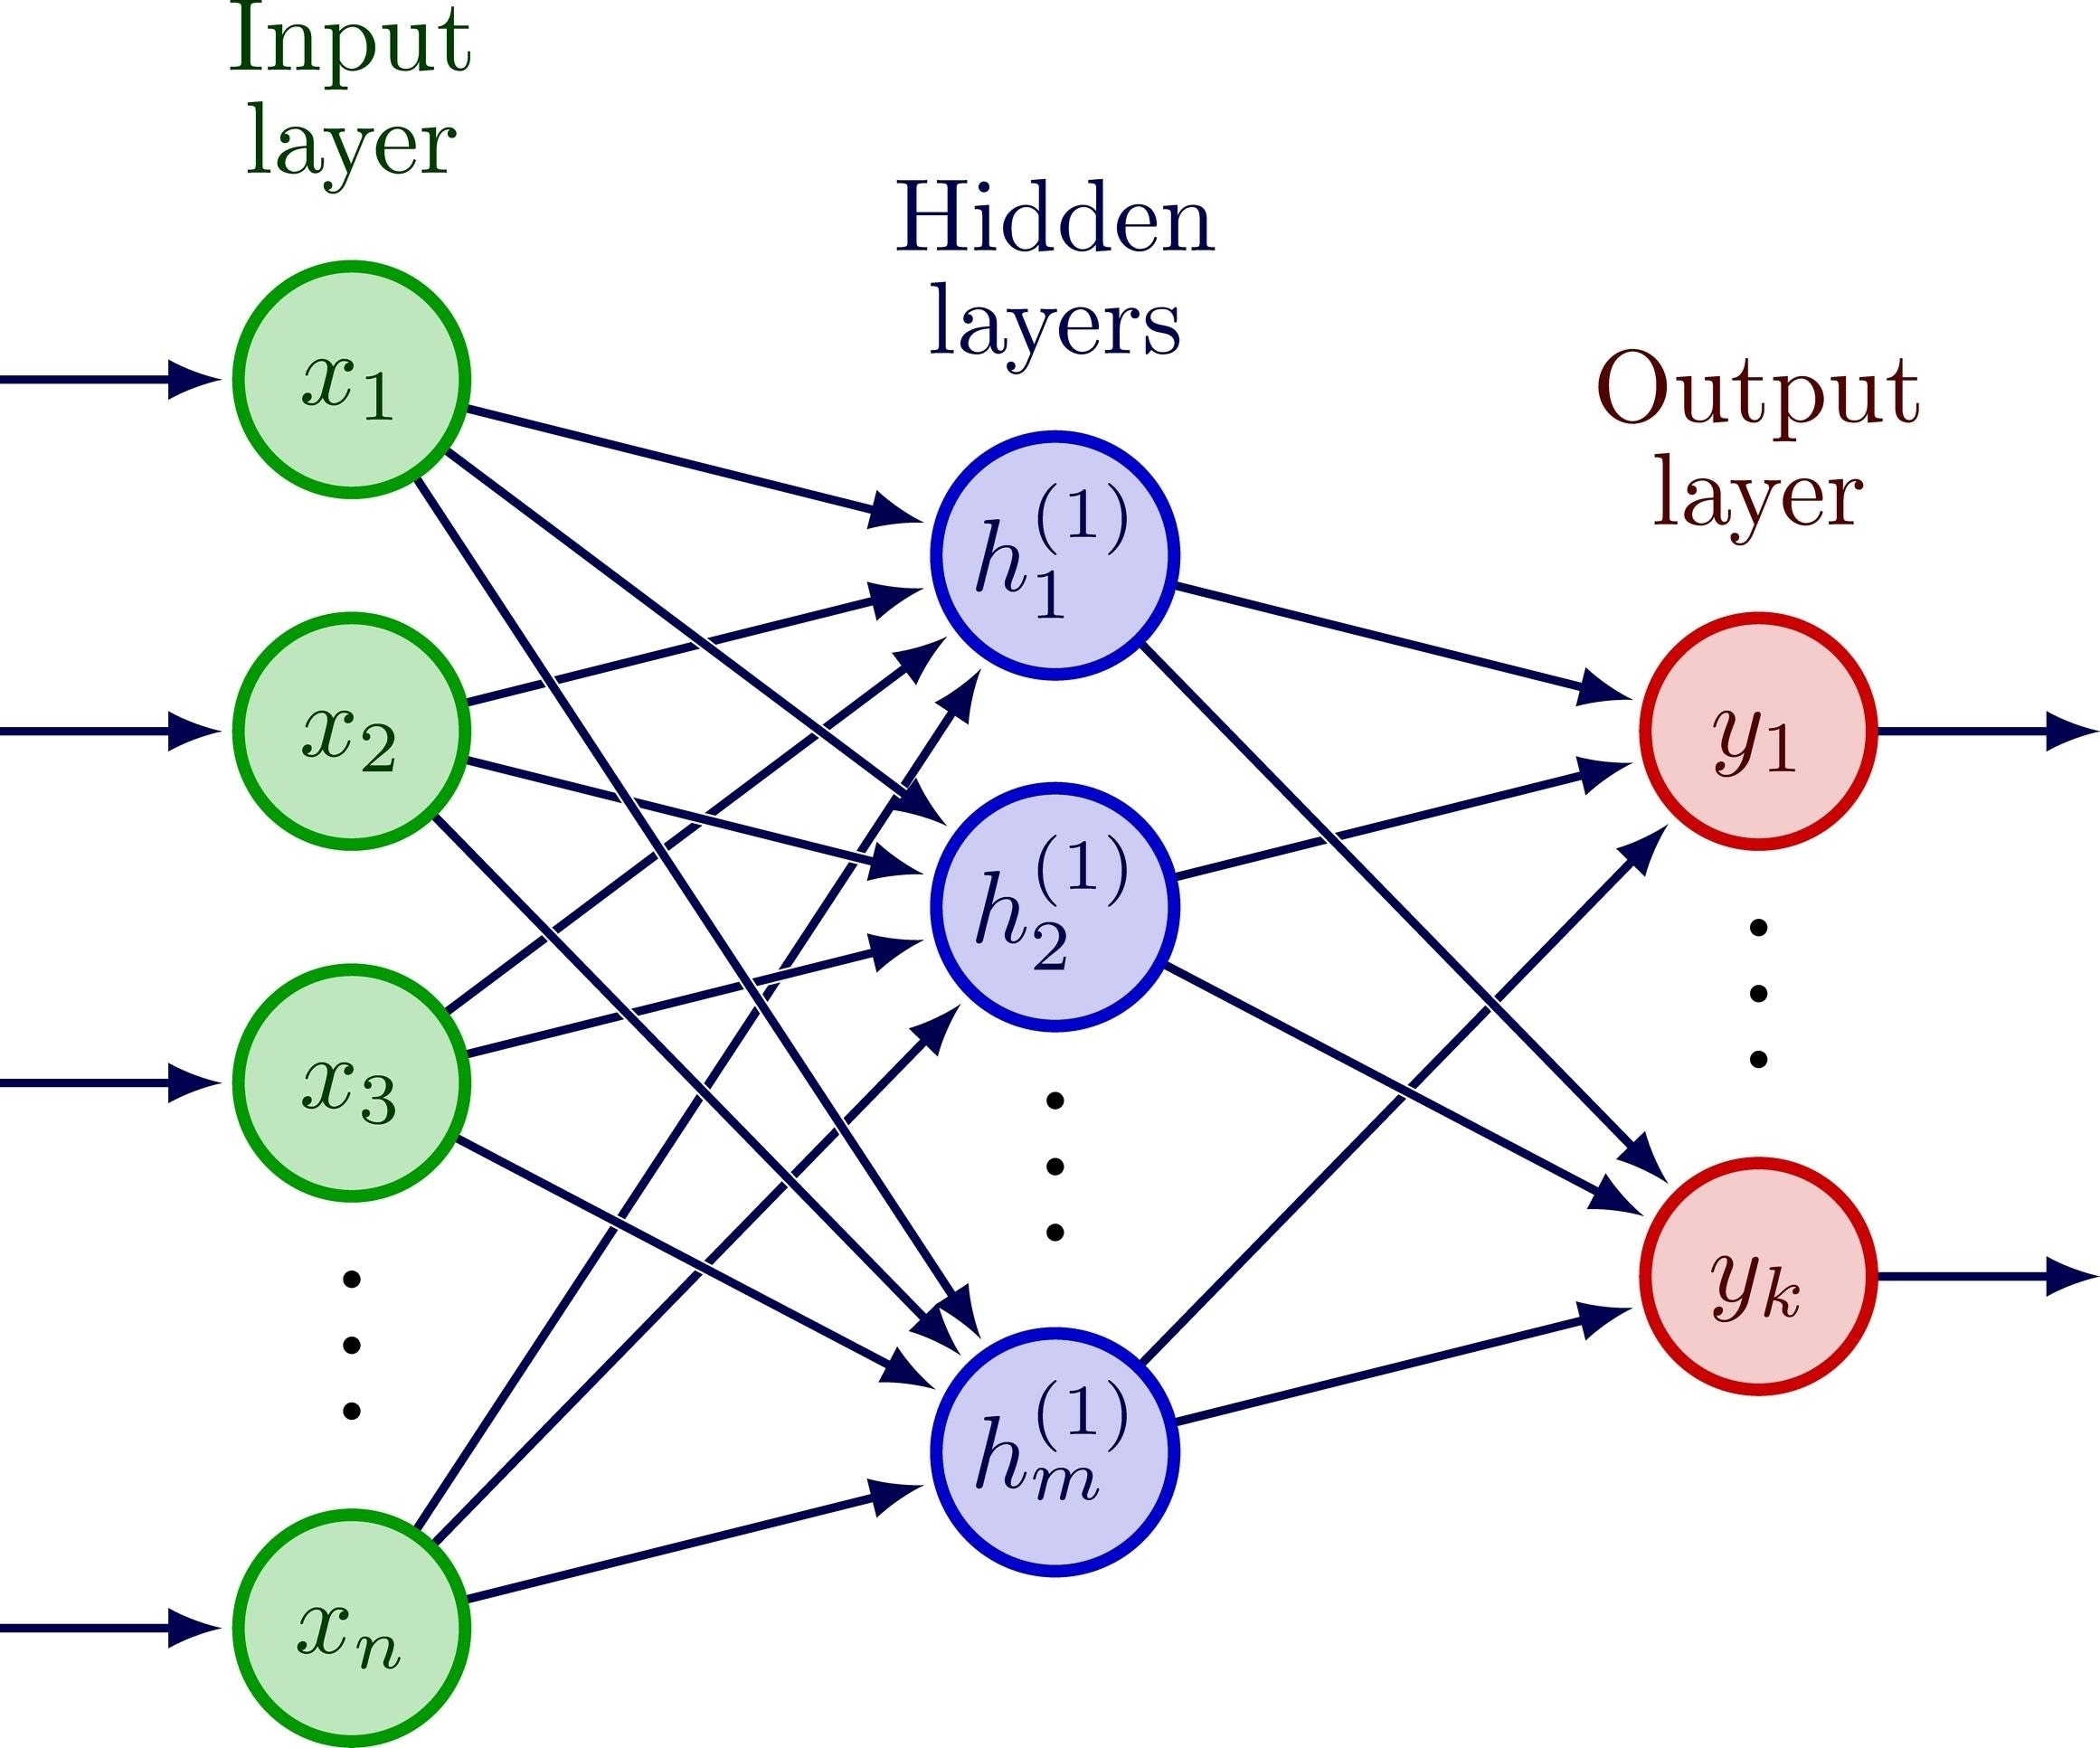

In [74]:
# Sequential

class Model(nn.Module):
  def __init__(self, nn_features):
    # Initialize the base nn.Module
    super().__init__()

    # --- The Container (nn.Sequential) ---
    # Instead of defining layers one by one, we stack them in a list.
    # Data will flow through these layers automatically in the exact order listed.
    self.network = nn.Sequential(
        # Layer 0: Input (nn_features) -> Hidden (3 neurons)
        nn.Linear(in_features=nn_features, out_features=3),

        # Layer 1: Non-Linear Activation
        nn.ReLU(),

        # Layer 2: Hidden (3) -> Output (1)
        nn.Linear(in_features=3, out_features=1),

        # Layer 3: Final Activation: Converts output to probability (0, 1)
        nn.Sigmoid()
    )

  def forward(self, input_features):
    """
    The Forward pass is now just one line.
    You pass the input into the 'network' container, and it handles the rest.
    """
    out = self.network(input_features)
    return out



In [75]:
# --- Create Data & Model ---
features = torch.rand(10, 5)
model = Model(features.shape[1])


In [76]:

# --- Run Prediction ---
model(features)


tensor([[0.5319],
        [0.5299],
        [0.4982],
        [0.5222],
        [0.5363],
        [0.5427],
        [0.5292],
        [0.5604],
        [0.5229],
        [0.5335]], grad_fn=<SigmoidBackward0>)

In [77]:

# --- Accessing Weights (THE FIX) ---
# ERROR IN YOUR CODE: model.linear.weight
# Why it fails: You didn't name any layer "linear". You named the container "network".
# To get weights from Sequential, you must access them by Index [0, 1, 2...].

# Access weights of the first layer (Index 0 in the Sequential list)
print(model.network[0].weight)


Parameter containing:
tensor([[-0.1967, -0.2879, -0.4419, -0.2278,  0.3979],
        [-0.1963,  0.2449,  0.2029, -0.0723, -0.2252],
        [ 0.2767, -0.0438,  0.2350,  0.0163,  0.0909]], requires_grad=True)


In [78]:

# Access bias of the second Linear layer (Index 2 in the Sequential list)
print(model.network[2].bias)

Parameter containing:
tensor([0.4111], requires_grad=True)



### Detailed Breakdown: `nn.Sequential`

`nn.Sequential` is a specific container used to stack layers in order. Think of it as a **Pipeline**.

#### **Why use it?**

1. **Cleaner Code:** In your previous `forward` method, you had to write 4 lines of code (`x = linear1(x)`, `x = relu(x)`, etc.). Here, you only write 1 line (`x = network(x)`).
2. **Modularity:** You can treat the entire chunk of layers as a single object. This is very useful when building complex models like ResNet or VGG, where you repeat blocks of layers many times.

#### **Trade-off: Accessing Weights**

When you use `nn.Sequential`, you lose the ability to give custom names (like `self.linear1`) to your layers.

* **Old Way:** `model.linear1.weight` (Easy to name).
* **Sequential Way:** `model.network[0].weight` (Must remember the index).

### 3. Comparison

| Feature | Your Previous Code (`nn.Module`) | This Code (`nn.Sequential`) |
| --- | --- | --- |
| **Flexibility** | **High**. You can create complex flows (e.g., skip connections, multiple inputs). | **Low**. Data must flow in a straight line from top to bottom. |
| **Readability** | Verbose. Requires writing every step in `forward()`. | **Clean**. `forward()` is often just one line. |
| **Best For...** | Complex architectures (ResNet, Transformers). | Simple, straight-forward stacks of layers. |



In [99]:
# --- 1. Data Ingestion ---
# Load the dataset directly from a GitHub URL into a Pandas DataFrame.
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

# Inspect the first 5 rows to understand what the data looks like.
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [100]:
# Check the dimensions: (Rows, Columns). Important to know dataset size.
print(df.shape)

# --- 2. Data Cleaning ---
# 'id': A unique identifier for the patient. Useless for prediction (noise).
# 'Unnamed: 32': Likely an artifact/error in the CSV (e.g., trailing commas).
# inplace=True means we modify the existing 'df' variable rather than creating a new one.
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Verify the columns are gone.
print(df.head())

(569, 33)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38      

In [101]:
# --- 3. Data Splitting ---
# We split the data BEFORE scaling to prevent "Data Leakage" (cheating).
# df.iloc[:, 1:] -> Features (All columns starting from index 1 to the end).
# df.iloc[:, 0]  -> Target (The first column, likely 'diagnosis' M/B).
# test_size=0.2  -> 80% of data for Training, 20% for Testing.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [102]:
# --- 4. Feature Scaling (Normalization) ---
# Neural Networks struggle if one feature is 0.01 and another is 1000.
# StandardScaler forces all features to have Mean=0 and Variance=1.
scaler = StandardScaler()

# fit_transform on TRAIN: Learn the mean/std of the training data and scale it.
X_train = scaler.fit_transform(X_train)

# transform on TEST: Use the SAME mean/std from train to scale test.
# Never 'fit' on test data!
X_test = scaler.transform(X_test)

# --- 5. Target Encoding ---
# The target is text ('M' for Malignant, 'B' for Benign).
# Machines need numbers. LabelEncoder turns 'B'/'M' into 0/1.
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# --- 6. Tensor Conversion ---
# PyTorch cannot read NumPy arrays directly; it needs Tensors.
# .astype(np.float32): Critical! Pandas uses float64 (Double) by default.
# PyTorch Neural Networks expect float32 (Float). Mismatch causes errors.
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

# Verify final shapes to ensure they match the network input.
print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([455, 30])
torch.Size([455])


### Defining the model

In [110]:
# --- 1. The Architecture (Blueprint) ---
# Inheriting from nn.Module gives us access to .parameters(), .to(device), etc.

# Custom neural network class
# Inherits from nn.Module
class MySimpleNN(nn.Module):

  def __init__(self, num_features):
    # Mandatory: Initialize the parent class to register the module correctly
    # Call parent class constructor
    super().__init__()

    # Define the "Learnable" Layers
    # nn.Linear automatically creates weights matrix (num_features x 1) and bias
    # It replaces: self.weights = torch.rand(...)
    # Fully connected (linear) layer
    # num_features → number of input features
    # 1 → single output neuron (binary classification)
    self.linear = nn.Linear(num_features, 1)

    # Define the Activation
    # It replaces: torch.sigmoid(...)
    # Converts logits to probabilities (0, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    # The flow of data: Input -> Linear (z = wx+b) -> Sigmoid (0-1 probability)
    out = self.linear(features)
    # Apply sigmoid activation
    out = self.sigmoid(out)
    return out

In [ ]:
# Training Hyperparameters

learning_rate = 0.1
# Controls size of gradient descent steps

epochs = 25
# Number of full passes over training data


In [104]:
# --- 2. The Loss Function ---
# Binary Cross Entropy Loss. It replaces your manual formula: -(y*log(p) + ...)
# This built-in function is numerically stable (handles log(0) errors for you).

loss_function = nn.BCELoss()
# Used for binary classification with sigmoid outputs


In [105]:
# --- 3. Initialize Model ---
# We pass the number of columns in our training data (features)
model = MySimpleNN(X_train_tensor.shape[1])



In [106]:
# --- 4. The Optimizer ---
# SGD (Stochastic Gradient Descent) manages the update rule.
# Updates the model parameters using computed gradients
# model.parameters() tells SGD: "These are the weights and biases you need to update."
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)



In [107]:
# --- 5. Training Loop ---
for epoch in range(epochs):

  # A. Forward Pass: Compute predictions
  y_pred = model(X_train_tensor)

  # B. Calculate Loss
  # y_train_tensor reshaped to match y_pred shape (N, 1)
  # .view(-1, 1) ensures the target shape matches y_pred shape exactly (N, 1)
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # C. Zero Gradients
  # We must clear old gradients before calculating new ones, or they will accumulate.
  optimizer.zero_grad()

  # D. Backward Pass: Calculate the gradients (dLoss/dWeight)
  loss.backward()

  # E. Update Weights
  # Replaces: with torch.no_grad(): weights -= lr * weights.grad
  optimizer.step()

  # Print progress
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')



Epoch: 1, Loss: 0.6691171526908875
Epoch: 2, Loss: 0.5160689353942871
Epoch: 3, Loss: 0.43300142884254456
Epoch: 4, Loss: 0.38156309723854065
Epoch: 5, Loss: 0.34617042541503906
Epoch: 6, Loss: 0.3199935853481293
Epoch: 7, Loss: 0.29963386058807373
Epoch: 8, Loss: 0.2832130491733551
Epoch: 9, Loss: 0.2696026563644409
Epoch: 10, Loss: 0.2580796182155609
Epoch: 11, Loss: 0.2481568157672882
Epoch: 12, Loss: 0.23949280381202698
Epoch: 13, Loss: 0.2318403124809265
Epoch: 14, Loss: 0.22501549124717712
Epoch: 15, Loss: 0.218878373503685
Epoch: 16, Loss: 0.2133202850818634
Epoch: 17, Loss: 0.20825539529323578
Epoch: 18, Loss: 0.20361489057540894
Epoch: 19, Loss: 0.19934290647506714
Epoch: 20, Loss: 0.19539335370063782
Epoch: 21, Loss: 0.19172804057598114
Epoch: 22, Loss: 0.18831485509872437
Epoch: 23, Loss: 0.18512658774852753
Epoch: 24, Loss: 0.18213997781276703
Epoch: 25, Loss: 0.1793351024389267


In [108]:
# --- 6. Evaluation ---
# no_grad() turns off gradient tracking to save memory/speed during testing.
with torch.no_grad():
  y_pred = model(X_test_tensor) # Use model() instead of .forward() usually

  # Convert probabilities to Class 0 or 1 (Threshold 0.5)
  y_pred_class = (y_pred > 0.5).float()

  # Calculate simple accuracy: (Correct Predictions / Total Samples)
  # y_test_tensor.view is safer to match dimensions
  accuracy = (y_pred_class == y_test_tensor.view(-1, 1)).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.9561403393745422
